## Import libraries

In [46]:
import pandas as pd
import numpy as np

## Get the data

In [47]:
train_data = pd.read_csv("../Data/train.csv")[:100000]
test_data = pd.read_csv("../Data/test.csv")[:20000]
test_data.head()

,SUGGEST,TITLE,SENTENCE
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [48]:
X_train = train_data["SENTENCE"]
y_train = train_data["SUGGEST"]
X_test = test_data["SENTENCE"]
y_test = test_data["SUGGEST"]

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder = LabelEncoder()

In [51]:
y_train_labeled = label_encoder.fit_transform(y_train)
y_test_labeled = label_encoder.fit_transform(y_test)

## Cleaning the data

In [52]:
from nltk.corpus import stopwords
import nltk # Natural Language Tool Kit
from bs4 import BeautifulSoup
import re

In [53]:
nltk.download("stopwords")
new_list = stopwords.words("english") # Download stopwords in English

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
stop_words = set(stopwords.words("english"))

In [55]:
def clean_sentence(sentence):
    if sentence != "":
        sentence = BeautifulSoup(sentence, "lxml").get_text()
        sentence = re.sub("[^a-zA-Z]", " ", sentence)
        sentence = sentence.lower()
        words_list = sentence.split()
        words_list_cleaned = [word for word in words_list if word not in stop_words]
        return (" ".join(words_list_cleaned))

## Clear all data

In [56]:
X_train_all = []
X_test_all = []

for i in range(len(X_train)):
    if (i + 1) % 15000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    
    X_train_all.append(clean_sentence(X_train[i]))

for i in range(len(X_test)):
    if (i + 1) % 5000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    
    X_test_all.append(clean_sentence(X_test[i]))

C:\Users\mehme\AppData\Local\Temp\ipykernel_26092\749091627.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").get_text()


14999 sentence cleaned and loaded.
29999 sentence cleaned and loaded.
44999 sentence cleaned and loaded.
59999 sentence cleaned and loaded.
74999 sentence cleaned and loaded.
89999 sentence cleaned and loaded.
4999 sentence cleaned and loaded.
9999 sentence cleaned and loaded.
14999 sentence cleaned and loaded.
19999 sentence cleaned and loaded.


## Tokenize the words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer(max_features=2000)

In [16]:
X_train_vectorized = vectorizer.fit_transform(X_train_all)
X_test_vectorized = vectorizer.transform(X_test_all)

X_train_vectorized = X_train_vectorized.toarray()
X_test_vectorized = X_test_vectorized.toarray()

X_train_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Get and train the models

### Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic_regression_model = LogisticRegression(solver="lbfgs", max_iter=3000)
logistic_regression_model.fit(X_train_vectorized, y_train_labeled)

LogisticRegression(max_iter=3000)

In [19]:
y_preds_log = logistic_regression_model.predict(X_test_vectorized)
y_preds_log

array([1, 1, 0, ..., 1, 1, 0])

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [21]:
acc_log = accuracy_score(y_test_labeled, y_preds_log)
acc_log_percent = acc_log * 100
print(f"Logistic Regression Model's accuracy is % {acc_log_percent:.2f}")

roc_log = roc_auc_score(y_test_labeled, y_preds_log)
roc_log_percent = roc_log * 100
print(f"Logistic Regression Model's roc_auc_score is % {roc_log_percent:.2f}")

Logistic Regression Model's accuracy is % 84.69
Logistic Regression Model's roc_auc_score is % 84.65


### Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_vectorized, y_train_labeled)

DecisionTreeClassifier()

In [24]:
y_preds_dtc = decision_tree_classifier.predict(X_test_vectorized)
y_preds_dtc

array([0, 0, 1, ..., 1, 0, 1])

In [25]:
acc_dtc = accuracy_score(y_test_labeled, y_preds_dtc)
acc_dtc_percent = acc_dtc * 100
print(f"Decision Tree Classifier Model's accuracy is % {acc_dtc_percent:.2f}")

Decision Tree Classifier Model's accuracy is % 72.28


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train_vectorized, y_train_labeled)

RandomForestClassifier()

In [28]:
y_preds_rf = random_forest_classifier.predict(X_test_vectorized)
y_preds_rf

array([1, 1, 0, ..., 1, 1, 1])

In [29]:
acc_rf = accuracy_score(y_test_labeled, y_preds_rf)
acc_rf_percent = acc_rf * 100
print(f"Random Forest Model's accuracy is % {acc_rf_percent:.2f}")

Random Forest Model's accuracy is % 81.81


### Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train_vectorized, y_train_labeled)

GaussianNB()

In [32]:
y_preds_gnb = gaussianNB.predict(X_test_vectorized)
y_preds_gnb

array([1, 1, 0, ..., 1, 0, 1])

In [33]:
acc_gnb = accuracy_score(y_test_labeled, y_preds_gnb)
acc_gnb_percent = acc_gnb * 100
print(f"Gaussian Naive Bayes Model's accuracy is % {acc_gnb_percent:.2f}")

Gaussian Naive Bayes Model's accuracy is % 77.28


### Bernoulli Naive Bayes

In [34]:
from sklearn.naive_bayes import BernoulliNB

In [35]:
bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train_vectorized, y_train_labeled)

BernoulliNB()

In [36]:
y_preds_bnb = bernoulliNB.predict(X_test_vectorized)
y_preds_bnb

array([1, 1, 0, ..., 1, 1, 1])

In [37]:
acc_bnb = accuracy_score(y_test_labeled, y_preds_bnb)
acc_bnb_percent = acc_bnb * 100
print(f"Bernoulli Naive Bayes Model's accuracy is % {acc_bnb_percent:.2f}")

Bernoulli Naive Bayes Model's accuracy is % 81.64


## Visualize the confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm_log = confusion_matrix(y_test_labeled, y_preds_log)
cm_log

array([[8064, 1722],
       [1339, 8875]])

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

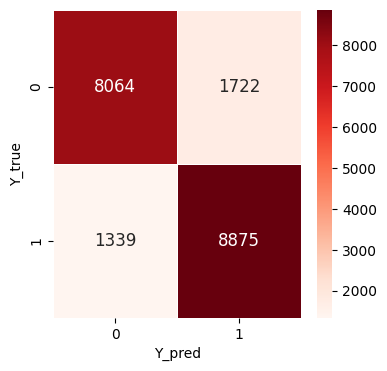

In [41]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_log, cmap="Reds", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

## Best model to choose is Logistic Regression Model with % 84.7 accuracy

## Give manual data

In [42]:
reviews = ["It is the best thing I have ever seen.", "It made me disappointed.", "Thank you so much for everything", "I will not buy anything again from this company.", "It works really well", "Do not buy it", "I do not suggest it", "It is worthless"]
reviews_cleaned = []

for review in reviews:
    reviews_cleaned.append(clean_sentence(review))

reviews_cleaned

['best thing ever seen',
 'made disappointed',
 'thank much everything',
 'buy anything company',
 'works really well',
 'buy',
 'suggest',
 'worthless']

In [43]:
reviews_cleaned_vectorized = vectorizer.transform(reviews_cleaned)
reviews_cleaned_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 18 stored elements and shape (8, 2000)>

In [44]:
y_pred_manual = logistic_regression_model.predict(reviews_cleaned_vectorized)
y_pred_manual

array([1, 0, 1, 0, 1, 0, 0, 0])

In [45]:
suggestion_dict = {0: "Not Suggest", 1: "Suggest"}

for idx, review in enumerate(reviews):
    print(f"The review '{review}' expresses '{suggestion_dict[y_pred_manual[idx]]}'.")

The review 'It is the best thing I have ever seen.' expresses 'Suggest'.
The review 'It made me disappointed.' expresses 'Not Suggest'.
The review 'Thank you so much for everything' expresses 'Suggest'.
The review 'I will not buy anything again from this company.' expresses 'Not Suggest'.
The review 'It works really well' expresses 'Suggest'.
The review 'Do not buy it' expresses 'Not Suggest'.
The review 'I do not suggest it' expresses 'Not Suggest'.
The review 'It is worthless' expresses 'Not Suggest'.
